# 4.10 Coding Etiquette & Excel Reporting

## This script contains the following points:

### 1. Import Libraries

### 2. Import Data

### 3. Data Visualisation

### 4. Import Additional Data

### 5. Export Data

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import Data

In [2]:
# Creating path string to folder
path = r'C:\Users\Admin\Desktop\Instacart Basket Analysis'

In [3]:
# Importing df from csv
active_customer = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'active_customer_full_profiles.csv')) 

In [4]:
# Check shape of df
active_customer.shape

(15329101, 35)

In [6]:
# Check info of df
active_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15329101 entries, 0 to 15329100
Data columns (total 35 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   order_id                       int64  
 2   user_id                        int64  
 3   order_number                   int64  
 4   orders_day_of_week             int64  
 5   hour_order_placed              int64  
 6   days_since_prior_order         float64
 7   product_id                     int64  
 8   add_to_cart_order              float64
 9   reordered                      int64  
 10  product_name                   object 
 11  aisle_id                       int64  
 12  department_id                  int64  
 13  prices                         float64
 14  busiest_days                   object 
 15  busiest_period_of_day          object 
 16  max_order                      int64  
 17  loyalty_flag                   object 
 18  

# 3. Data Visualisation

([<matplotlib.axis.XTick at 0x29f57f0ec70>,
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tue'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thur'),
  Text(6, 0, 'Fri')])

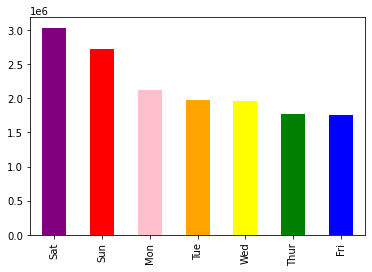

In [7]:
# Create bar chart to show day of week with most orders, from exercise 4.9, with labelled axis
bar = active_customer['orders_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

# Label x axis
values = ['Sat','Sun','Mon','Tue','Wed','Thur','Fri']
x = [0,1,2,3,4,5,6]
plt.xticks(x,values)

In [8]:
# Export chart as image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations','bar_orders_dow_2.png'))

# 4. Import Additional Data

In [16]:
# Importing df from csv
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv')) 

In [20]:
# Check df
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [21]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [22]:
# Merge departments with active customer on 'department_id'
active_customer_dep = active_customer.merge(departments, on = ['department_id'])

In [23]:
active_customer_dep.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,hour_order_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,...,no_of_dependents,fam_status,income,Region,low_activity_flag,customer_profile,income_profile,diet_profile,family_profile,department
0,0,-16575,1,1,2,8,NaN,196,1.0,0,...,3,married,40423,South,Active customer,Young Married with Kids,Lower income,Vegetarian,Family,beverages
1,1,-26037,1,2,3,7,15.0,196,1.0,1,...,3,married,40423,South,Active customer,Young Married with Kids,Lower income,Vegetarian,Family,beverages
2,2,14995,1,3,3,12,21.0,196,1.0,1,...,3,married,40423,South,Active customer,Young Married with Kids,Lower income,Vegetarian,Family,beverages
3,3,26512,1,4,4,7,29.0,196,1.0,1,...,3,married,40423,South,Active customer,Young Married with Kids,Lower income,Vegetarian,Family,beverages
4,4,-27218,1,5,4,15,28.0,196,1.0,1,...,3,married,40423,South,Active customer,Young Married with Kids,Lower income,Vegetarian,Family,beverages


In [25]:
active_customer_dep.shape

(15329101, 36)

# 5. Export Data

In [26]:
active_customer_dep.to_csv(os.path.join(path,'02 Data','Prepared Data','active_customer_full_profiles_dep.csv'))